In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [2]:
data_folder = "../../../data/"

figures_folder = "../../Figures/Group4/"

sif_output = "../../sif_files/Group4/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

In [5]:
df = resources.interactions

In [6]:
# Remove rows where 'source' or 'target' starts with "CHEBI"
filtered_df = df[~(df['source'].str.startswith('CHEBI') | df['target'].str.startswith('CHEBI'))]

In [7]:
data = pd.read_csv(data_folder + "gene_per_subgroup_correlation_sorted_melt.csv")

In [8]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group
top_n = 50  # Set the desired number of genes to display per group

top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

top_genes_per_group

/tmp/ipykernel_18958/189381725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


,Gene,Group,Correlation
0,ZFPM2,Group3,0.957692
1,FOXG1,Group3,0.947957
2,FSTL5,Group3,0.942308
3,PAPPA2,Group3,0.941538
4,IMPG2,Group3,0.941538
...,...,...,...
195,LRRC55,WNT,0.876923
196,SYT1,WNT,0.875385
197,SYT2,WNT,0.874615
198,PLXDC1,WNT,0.872308


In [9]:
group4_list = top_genes_per_group[top_genes_per_group["Group"] == "Group4"]["Gene"].reset_index(drop=True).to_list()

Selecting just Group 4 group

In [10]:
group4_list

['FAM65B',
 'SIX6',
 'SNCAIP',
 'FOXG1',
 'SLC10A4',
 'CNPY1',
 'EN2',
 'PTPRO',
 'KIAA1239',
 'UNC5D',
 'AC012215.1',
 'ENC1',
 'HIST1H4F',
 'FEZF1',
 'DOK6',
 'CAMK2N1',
 'GSG1L',
 'SEMA3A',
 'KCNA5',
 'ISLR2',
 'LINGO2',
 'RALYL',
 'DLGAP1',
 'RBM24',
 'LMX1A',
 'LHX2',
 'SH3GL2',
 'ASTN2',
 'INPP5F',
 'CTTNBP2',
 'FGF12',
 'PPP1R1A',
 'PTPN5',
 'TRPC5',
 'TBR1',
 'ERBB4',
 'CHL1',
 'GPR12',
 'NCKAP5',
 'RP11-247C2.2',
 'KCNK2',
 'SYT6',
 'B4GALT6',
 'NMNAT3',
 'MEIS2',
 'LHX4',
 'CDH23',
 'FREM3',
 'LPPR4',
 'C13orf45']

# Creating a Network starting from All Omnipath interactions

In [11]:
group4_net = Network(group4_list, resources = filtered_df)

Error: node FAM65B is not present in the resources database
Error: node SLC10A4 is not present in the resources database
Error: node CNPY1 is not present in the resources database
Error: node PTPRO is not present in the resources database
Error: node KIAA1239 is not present in the resources database
Error: node AC012215.1 is not present in the resources database
Error: node ENC1 is not present in the resources database
Error: node FEZF1 is not present in the resources database
Error: node CAMK2N1 is not present in the resources database
Error: node GSG1L is not present in the resources database
Error: node ISLR2 is not present in the resources database
Error: node LINGO2 is not present in the resources database
Error: node RALYL is not present in the resources database
Error: node RBM24 is not present in the resources database
Error: node INPP5F is not present in the resources database
Error: node PPP1R1A is not present in the resources database
Error: node GPR12 is not present in the 

In [12]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,SIX6,O95475,NaN
1,SNCAIP,Q9Y6H5,NaN
2,FOXG1,P55316,NaN
3,EN2,P19622,NaN
4,UNC5D,Q6UXZ4,NaN
5,H4C11,P62805,NaN
6,DOK6,Q6PKX4,NaN
7,SEMA3A,Q14563,NaN
8,KCNA5,P22460,NaN
9,DLGAP1,O14490,NaN


In [13]:
group4_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=True, connect_with_bias=False, consensus=False)

In [14]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,SIX6,O95475,NaN
1,SNCAIP,Q9Y6H5,NaN
2,FOXG1,P55316,NaN
3,EN2,P19622,NaN
4,UNC5D,Q6UXZ4,NaN
...,...,...,...
64,PIK3CG,P48736,NaN
65,PDPK1,O15530,NaN
66,PRKCB,P05771,NaN
67,NOTCH1,P46531,NaN


In [15]:
group4_net.edges

,source,target,Type,Effect,References
0,P54829,Q16539,None,stimulation,23932588; 23932588
1,Q16539,P49841,None,inhibition,17726008; 18451303; 17726008; 18451303
2,P49841,Q9Y6H5,None,inhibition,16174773; 16174773
3,Q16539,O43255,None,stimulation,17003045; 17003045
4,O43255,Q9Y6H5,None,inhibition,16174773; 16174773
...,...,...,...,...,...
142,Q00987,P46531,None,stimulation,23252402
143,P10586,P06241,None,bimodal,12496362
144,P28360,P56178,None,inhibition,9111364
145,Q96J02,P46531,None,inhibition,10940313


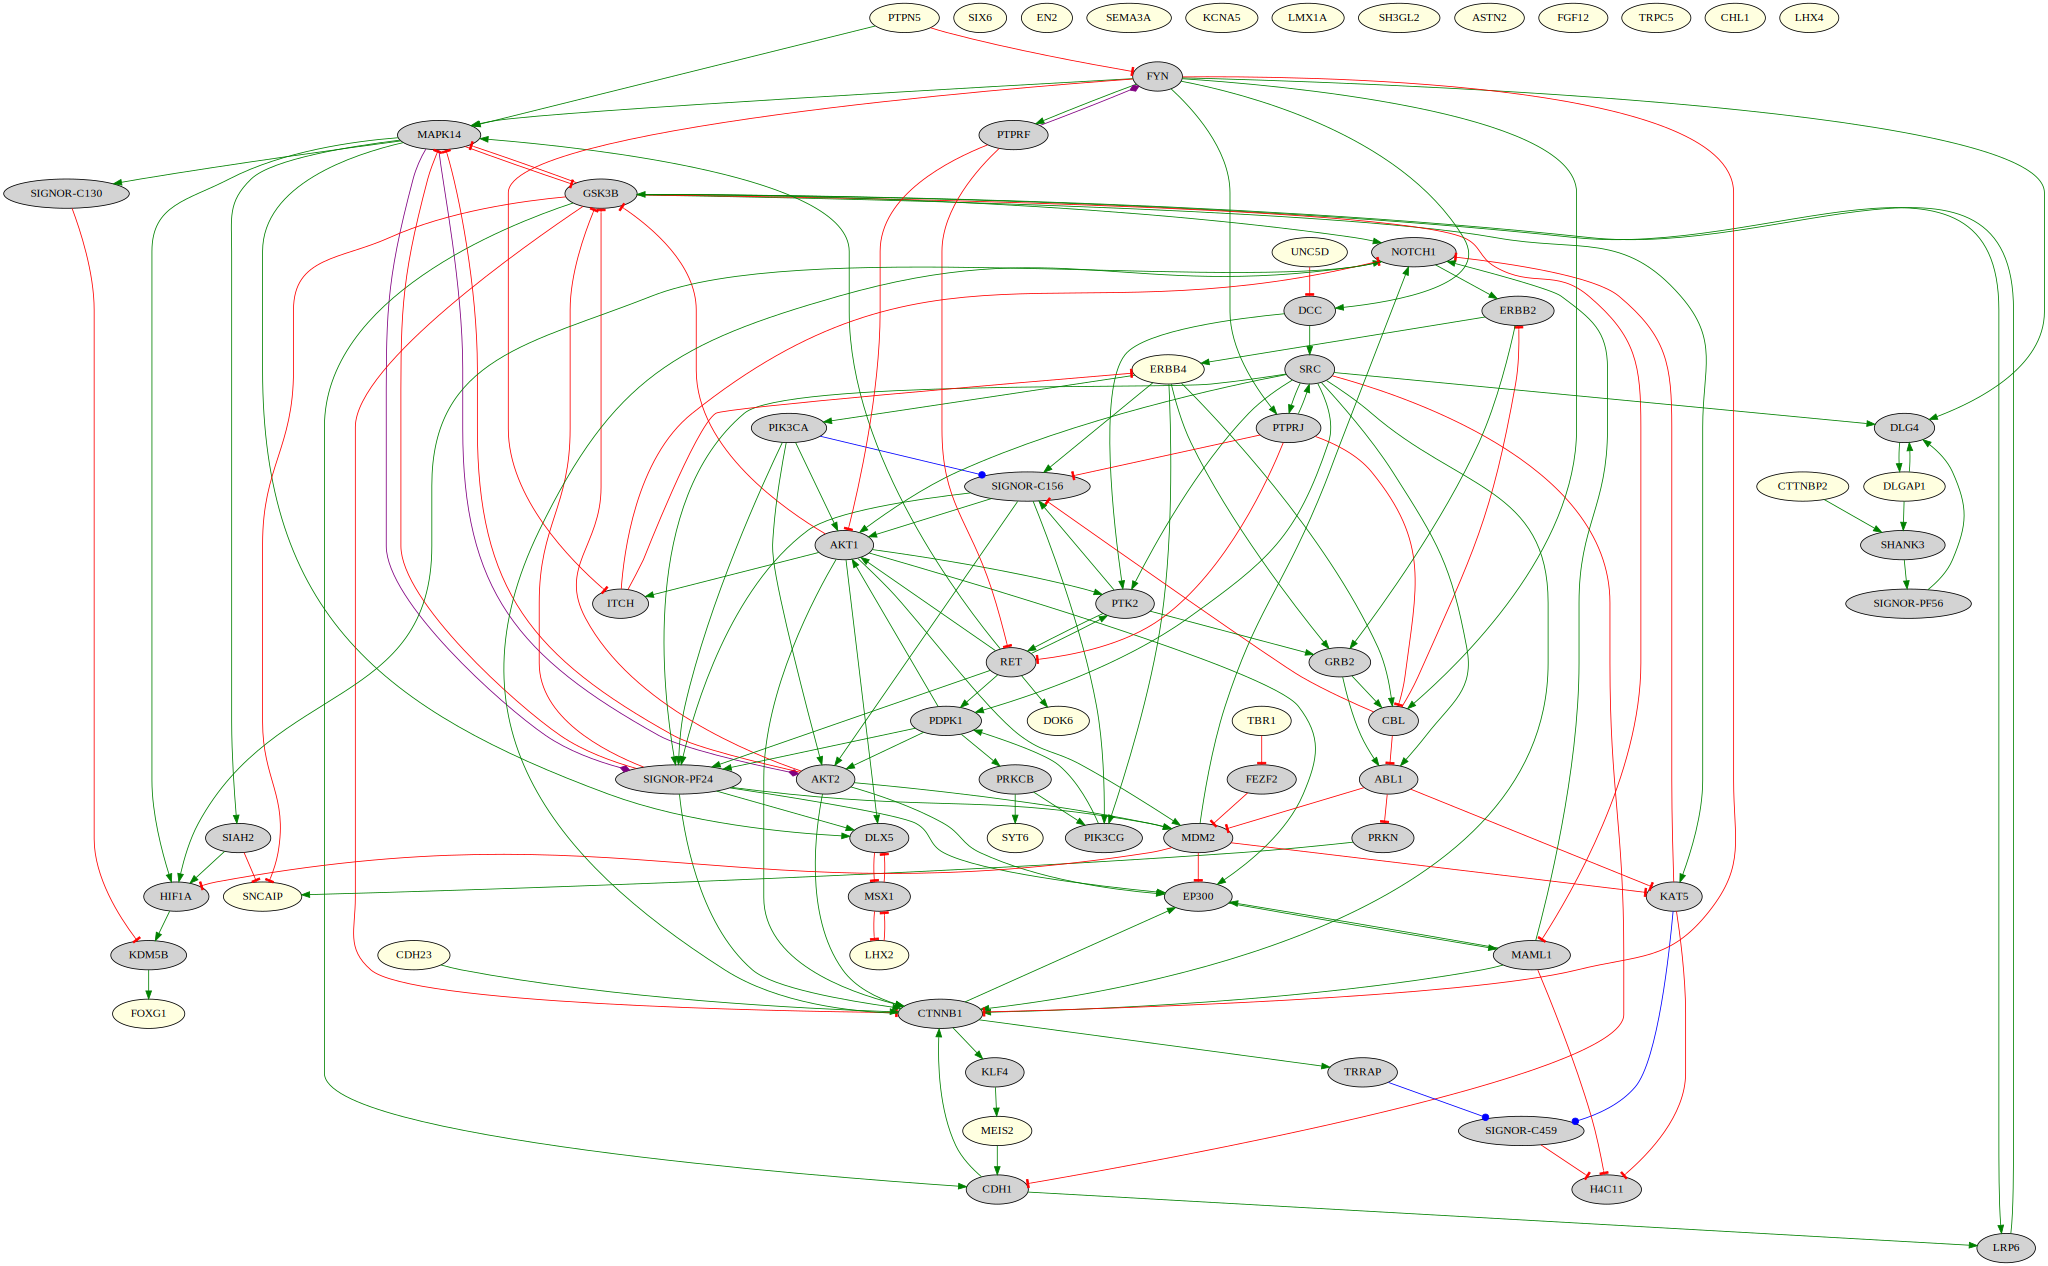

In [16]:
group4_visualizer = NetworkVisualizer(group4_net,color_by='effect', noi=True)
output = figures_folder + "Group4_signor_Lin"
group4_visualizer.render(output_file=output)

# Exporting Network in sif file

In [17]:
from neko._outputs.exports import Exports

In [18]:
for node in group4_net.nodes["Uniprot"]:
    if node not in group4_net.edges["source"].values and node not in group4_net.edges["target"].values:
        node = group4_net.nodes[ group4_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        group4_net.remove_node(node[0])

['SIX6']
['EN2']
['SEMA3A']
['KCNA5']
['LMX1A']
['SH3GL2']
['ASTN2']
['FGF12']
['TRPC5']
['CHL1']
['LHX4']


In [19]:
export = Exports(group4_net)

In [20]:
export.export_sif(sif_output + "Group4_signor.sif")